In [2]:
import pickle
import numpy as np
import matplotlib.pyplot as plt
import sys
sys.path.append('..')
from utils.util import *
import pandas as pd
import seaborn as sns
sns.set_theme()
sns.set_style("darkgrid")
# sns.set_context("paper")
sns.set_context("talk")

In [3]:
def runs_to_df(runs_result):
    train_accs, test_accs = np.asarray(runs_result['train_acc']), np.asarray(runs_result['test_acc'])
    runs, checkpoints = train_accs.shape
    tr = pd.DataFrame(train_accs, columns=np.arange(checkpoints)) 
    ts = pd.DataFrame(test_accs, columns=np.arange(checkpoints)) 
    tr.insert(0, 'runs', np.arange(runs))
    ts.insert(0, 'runs', np.arange(runs))
    df_train = pd.melt(tr, id_vars=['runs'], var_name='Steps', value_name='Accuracy')
    df_test = pd.melt(ts, id_vars=['runs'], var_name='Steps', value_name='Accuracy')
    df_train['Label'] = 'train'
    df_test['Label'] = 'test'
    df = pd.concat([df_train, df_test])
    return df, df_train, df_test

def plot_accs(df_train_acc, df_test_acc, title, ax):
    ax = sns.lineplot(data=df_train_acc,
                x="Steps", y="Accuracy", hue="Label", style="Label",
                markers=True, dashes=False, err_style="bars", ci=68, palette=['orange'], ax=ax)
    ax = sns.lineplot(data=df_test_acc,
                x="Steps", y="Accuracy", hue="Label", style="Label",
                markers=True, dashes=False, err_style="bars", ci=68, ax=ax)
    ax.set_title(title)
    return ax

In [4]:
ctx_order = 'first'
ctx_order_str = 'ctxF'
analyze_name = 'analyze_accs'

In [15]:
with open('../../results/%s_results_mlp.P' %(analyze_name), 'rb') as f:
    mlp_results = pickle.load(f)

ctx_order_str = 'ctxF'
with open('../../results/%s_%s_results_rnn_init1.P' %(analyze_name, ctx_order_str), 'rb') as f:
    rnn_results_ctxF = pickle.load(f)
with open('../../results/%s_%s_results_rnncell_init1.P' %(analyze_name, ctx_order_str), 'rb') as f:
    rnncell_results_ctxF = pickle.load(f)


ctx_order_str = 'ctxL'
with open('../../results/%s_%s_results_rnn_init1.P' %(analyze_name, ctx_order_str), 'rb') as f:
    rnn_results_ctxL = pickle.load(f)
with open('../../results/%s_%s_results_rnncell_init1.P' %(analyze_name, ctx_order_str), 'rb') as f:
    rnncell_results_ctxL = pickle.load(f)


with open('../../results/%s_results_stepwisemlp.P' %(analyze_name), 'rb') as f:
    swmlp_results = pickle.load(f)

with open('../../results/%s_results_truncated_stepwisemlp.P' %(analyze_name), 'rb') as f:
    trunc_swmlp_results = pickle.load(f)

In [17]:
mlp_runs      = dict_to_list(mlp_results, analyze_name)
rnn_ctxF_runs = dict_to_list(rnn_results_ctxF, analyze_name)
rnn_ctxL_runs = dict_to_list(rnn_results_ctxL, analyze_name)
rnncell_ctxF_runs  = dict_to_list(rnncell_results_ctxF, analyze_name)
rnncell_ctxL_runs  = dict_to_list(rnncell_results_ctxL, analyze_name)
swmlp_runs   = dict_to_list(swmlp_results, analyze_name)
trunc_swmlp_runs   = dict_to_list(trunc_swmlp_results, analyze_name)
mlp_runs.keys()

dict_keys(['train_acc', 'test_acc', 'cong_train_acc', 'incong_train_acc', 'cong_test_acc', 'incong_test_acc'])

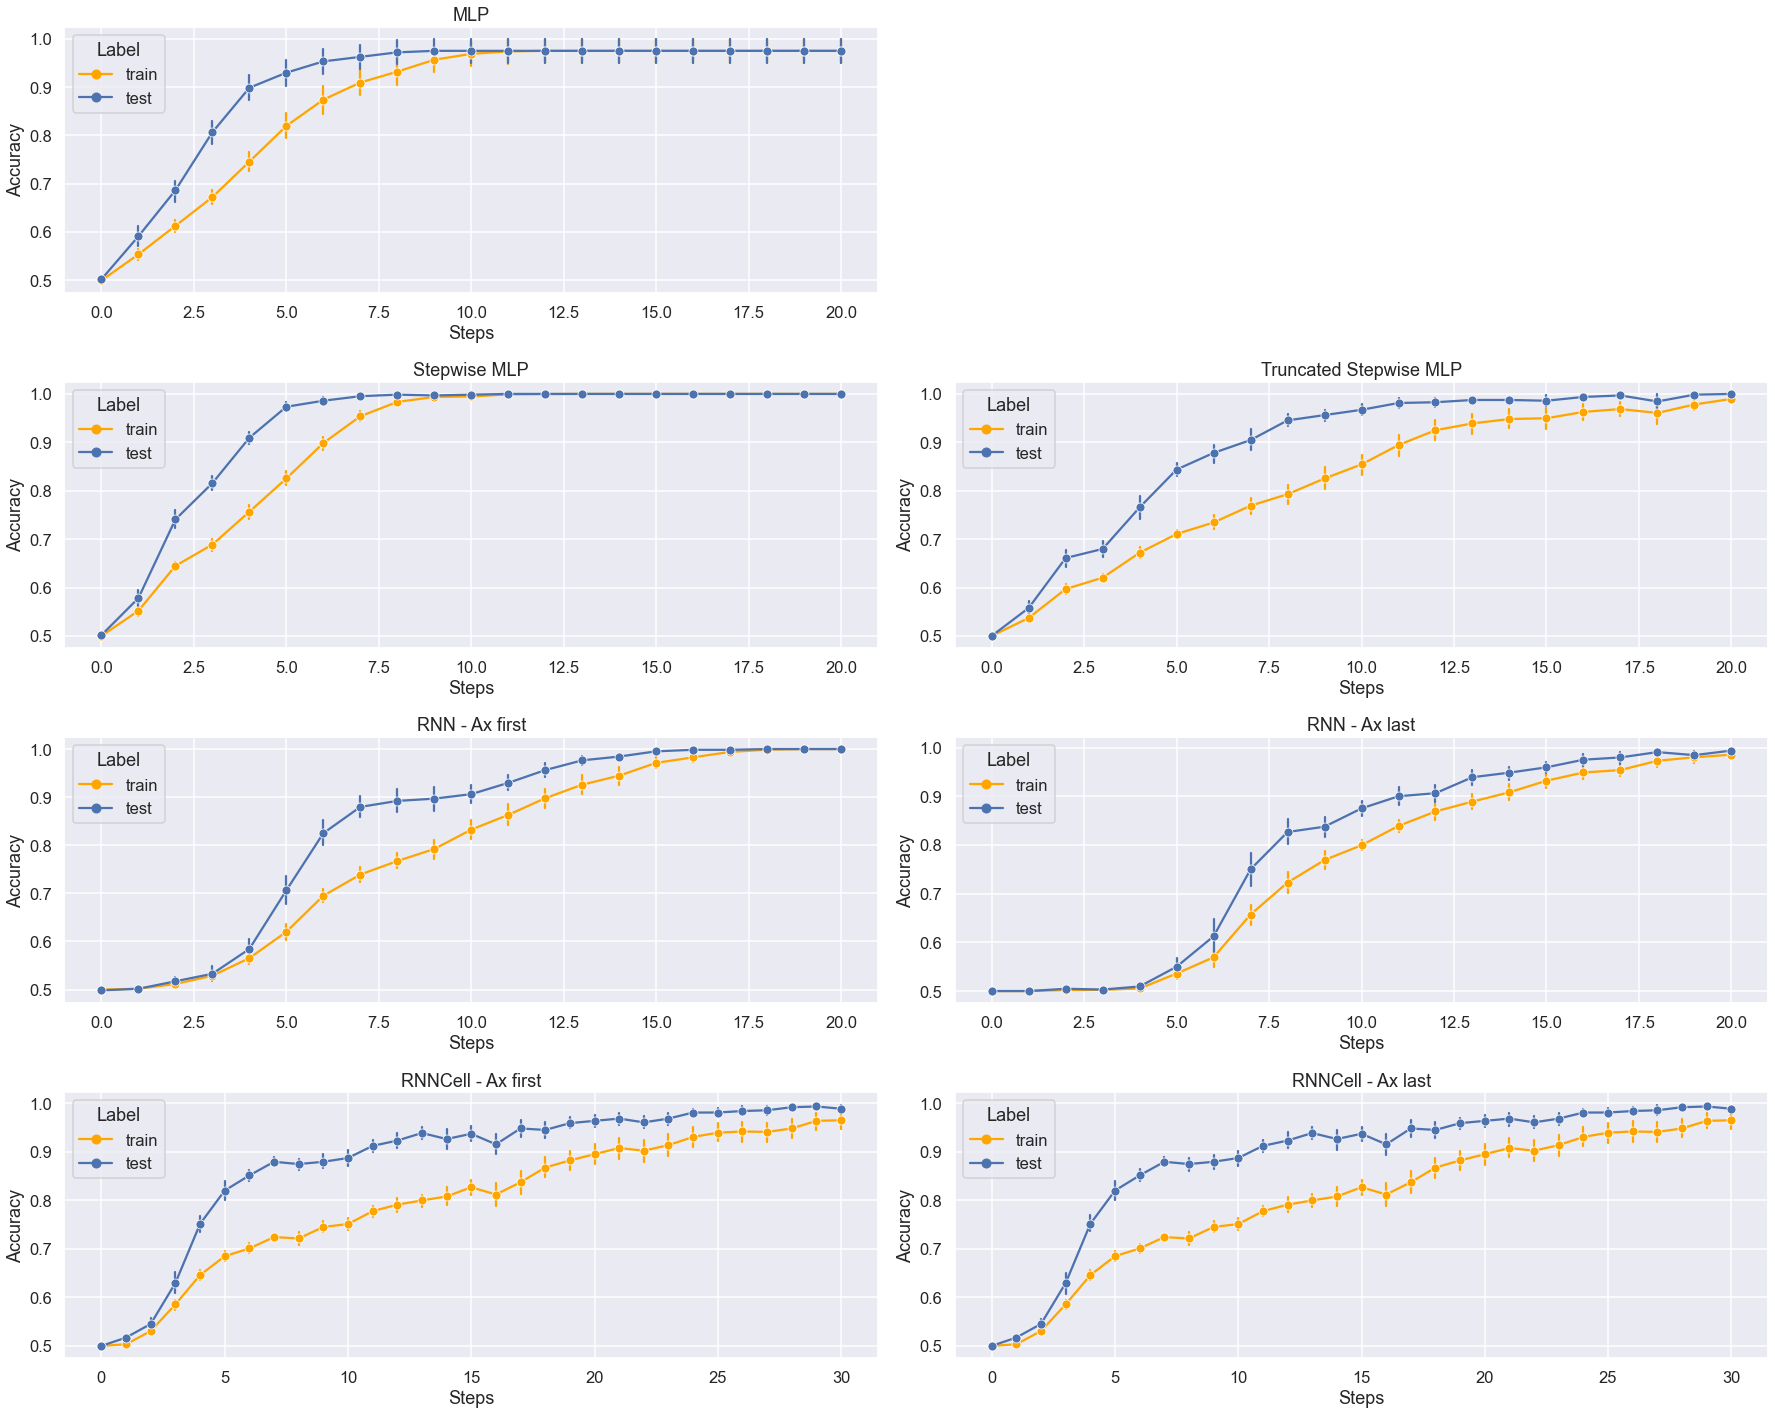

In [21]:
fig, axs = plt.subplots(4,2, figsize = [25, 20])

df, df_train, df_test = runs_to_df(mlp_runs)
ax = plot_accs(df_train, df_test, "MLP", axs[0][0])
fig.delaxes(axs[0][1])

df, df_train, df_test = runs_to_df(swmlp_runs)
ax = plot_accs(df_train, df_test, "Stepwise MLP", axs[1][0])

df, df_train, df_test = runs_to_df(trunc_swmlp_runs)
ax = plot_accs(df_train, df_test, "Truncated Stepwise MLP", axs[1][1])


ctx_order = 'first'
df, df_train, df_test = runs_to_df(rnn_ctxF_runs)
ax = plot_accs(df_train, df_test, "RNN - Ax %s" %(ctx_order), axs[2][0])

df, df_train, df_test = runs_to_df(rnncell_ctxF_runs)
ax = plot_accs(df_train, df_test, "RNNCell - Ax %s" %(ctx_order), axs[3][0])

ctx_order = 'last'
df, df_train, df_test = runs_to_df(rnn_ctxL_runs)
ax = plot_accs(df_train, df_test, "RNN - Ax %s" %(ctx_order), axs[2][1])

df, df_train, df_test = runs_to_df(rnncell_ctxL_runs)
ax = plot_accs(df_train, df_test, "RNNCell - Ax %s" %(ctx_order), axs[3][1])

plt.tight_layout()


fig_str = 'analyze_accs_results_all_models'
# fig.suptitle('PCA Results', fontweight='bold')
plt.tight_layout()
fig.savefig(('../../figures/' + fig_str + '.pdf'), 
            bbox_inches = 'tight', pad_inches = 0)
fig.savefig(('../../figures/' + fig_str + '.png'), 
            bbox_inches = 'tight', pad_inches = 0)

<Figure size 432x288 with 0 Axes>

In [87]:
# # long format of df

# def val_to_df(runs_result):
#     train_accs = np.asarray(runs_result['train_acc']) # [run, checkpoints, n_ctxs, n_trials, hidd_dim]
#     test_accs = np.asarray(runs_result['test_acc']) # [run, checkpoints, n_ctxs, n_trials, hidd_dim]
#     runs, checkpoints = train_accs.shape
#     train_acc = np.median(train_accs, axis=0)
#     test_acc = np.median(test_accs, axis=0)
#     tr = ['train-acc']*checkpoints
#     ts = ['test-acc']*checkpoints
#     labels = tr + ts
#     steps = np.zeros([checkpoints*2])
#     steps[0:checkpoints] = np.arange(checkpoints)
#     steps[checkpoints:] = np.arange(checkpoints)
#     acc_mlp = np.zeros([checkpoints*2])
#     acc_mlp[0:checkpoints] = train_acc
#     acc_mlp[checkpoints:] = test_acc
#     df = pd.DataFrame(acc_mlp)
#     df['Labels'] = labels
#     df.columns.values[0] = 'Accuracy'
#     df['Steps'] = steps
#     return df

In [139]:
# sanity check 

# runs_result = mlp_runs
# train_accs = np.asarray(runs_result['train_acc']) # [run, checkpoints, n_ctxs, n_trials, hidd_dim]
# test_accs = np.asarray(runs_result['test_acc']) # [run, checkpoints, n_ctxs, n_trials, hidd_dim]
# runs, checkpoints = train_accs.shape
# train_acc = np.median(train_accs, axis=0)
# test_acc = np.median(test_accs, axis=0)
# plt.plot(train_acc)
# plt.plot(test_acc)

In [24]:
# df for the boxplots

# def val_to_df_runs(train_accs, test_accs):
#     runs, checkpoints = train_accs.shape
#     dftr = pd.DataFrame(train_accs, columns=np.arange(checkpoints)) 
#     dfts = pd.DataFrame(test_accs, columns=np.arange(checkpoints)) 
#     dftr.insert(0, 'runs', np.arange(runs))
#     dfts.insert(0, 'runs', np.arange(runs))
#     dftr2 = pd.melt(dftr, id_vars=['runs'], var_name='steps', value_name='train_acc')
#     dfts2 = pd.melt(dfts, id_vars=['runs'], var_name='steps', value_name='test_acc')
#     df = dftr2
#     df['test_acc'] = dfts2['test_acc']
#     return df

